# Dogs Vs Cats Classification  

The Dogs vs. Cats classification problem is a basic CNN task where the goal is to identify images as either dogs or cats.

## Import Libraries

I will use these libraries: Pandas for loading data, Numpy for fast computations, Matplotlib for visualizations, Sklearn for data preprocessing and model development, OpenCV for image processing, and TensorFlow for machine learning and AI tasks.

In [1]:
# Basic
import os
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
import numpy as np
import pandas as pd

# visuals
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,MaxPooling2D,Dropout,Flatten,BatchNormalization,Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

## Data Extraction

The dataset, comprising two folders "Cats" and "Dogs," each containing 12,500 images of the respective animals, is stored as a zip file. To extract the contents of the zip files into the specified directory, we can utilize the zipfile module in Python.

In [2]:
train_path = "C:\\Users\\kumud\\Downloads\\pdata\\D vs C\\test1.zip"
test_path = "C:\\Users\\kumud\\Downloads\\pdata\\D vs C\\train.zip"

files = "C:/Users/kumud/Downloads/pdata/D vs C/"

import zipfile

with zipfile.ZipFile(train_path, 'r') as zipp:
    zipp.extractall(files)
    
with zipfile.ZipFile(test_path, 'r') as zipp:
    zipp.extractall(files)

Data Extraction and Loading Images in a Dataframe:

In [3]:
image_dir = "C:/Users/kumud/Downloads/pdata/D vs C/train/"

filenames = os.listdir(image_dir)
labels = [x.split(".")[0] for x in filenames]

data = pd.DataFrame({"filename": filenames, "label": labels})

data.head()

,filename,label
0,cat.0.jpg,cat
1,cat.1.jpg,cat
2,cat.10.jpg,cat
3,cat.100.jpg,cat
4,cat.1000.jpg,cat


In [4]:
length = data.shape[0]
print("Length of DataFrame:", length)

Length of DataFrame: 25000


## Data Exploration

In the data exploration phase, we aim to visually understand and explore the provided images for building a classifier for each class. This involves visualizing the variables of interest, such as images of cats and dogs. 

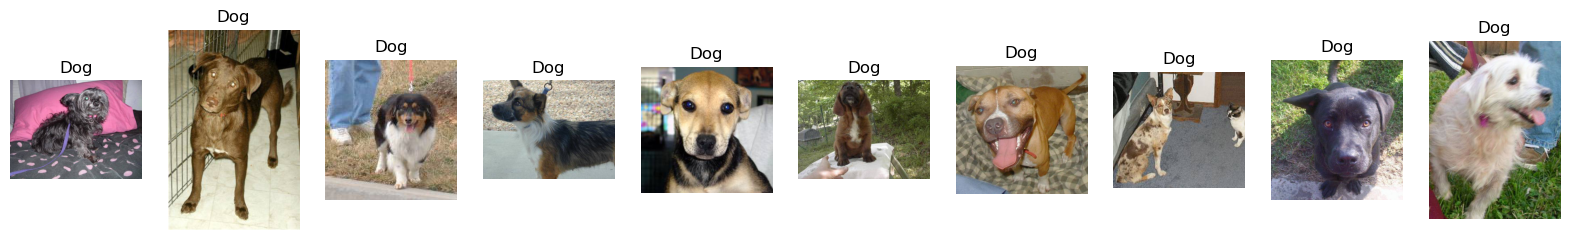

In [5]:
# Visualizing few images of Dogs.
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)


for i in range(10):
    
    plt.subplot(1,10,i+1)    # the number of images in the grid is 10*10 (100)
    filename = 'C:/Users/kumud/Downloads/pdata/D vs C/train/' + 'dog.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Dog',fontsize=12)
    plt.axis('off')

plt.show()

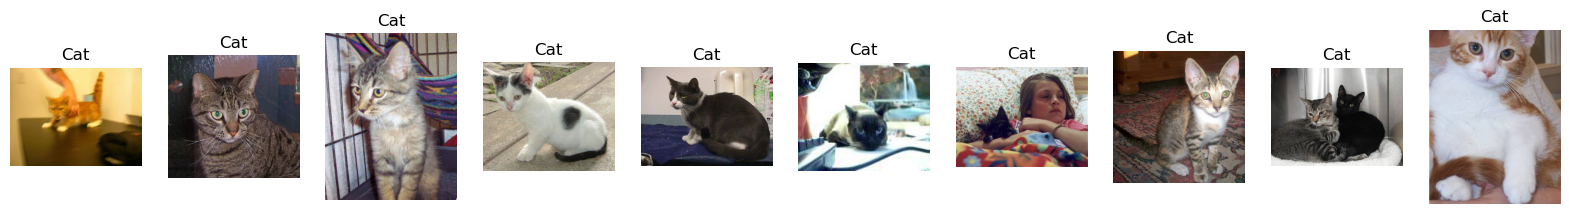

In [6]:
# Visualizing few images of Dogs.
plt.figure(figsize=(20,20)) # specifying the overall grid size
plt.subplots_adjust(hspace=0.4)


for i in range(10):
    
    plt.subplot(1,10,i+1)    # the number of images in the grid is 10*10 (100)
    filename = 'C:/Users/kumud/Downloads/pdata/D vs C/train/' + 'cat.' + str(i) + '.jpg'
    image = imread(filename)
    plt.imshow(image)
    plt.title('Cat',fontsize=12)
    plt.axis('off')

plt.show()

## Train Test Split

We start with our main dataset and separate a portion for training. Then, we split the remaining data equally into test and validation sets. Finally, we check and print the sizes of each set.

In [7]:
labels = data['label']

X_train, X_temp = train_test_split(data, test_size=0.2, stratify=labels, random_state = 42)

label_test_val = X_temp['label']

X_test, X_val = train_test_split(X_temp, test_size=0.5, stratify=label_test_val, random_state = 42)

print('The shape of train data',X_train.shape)
print('The shape of test data',X_test.shape)
print('The shape of validation data',X_val.shape)

The shape of train data (20000, 2)
The shape of test data (2500, 2)
The shape of validation data (2500, 2)


### Class distrubtion in trainting dataset

Now we will Create a barplot to see the class distrubtion in trainting dataset.

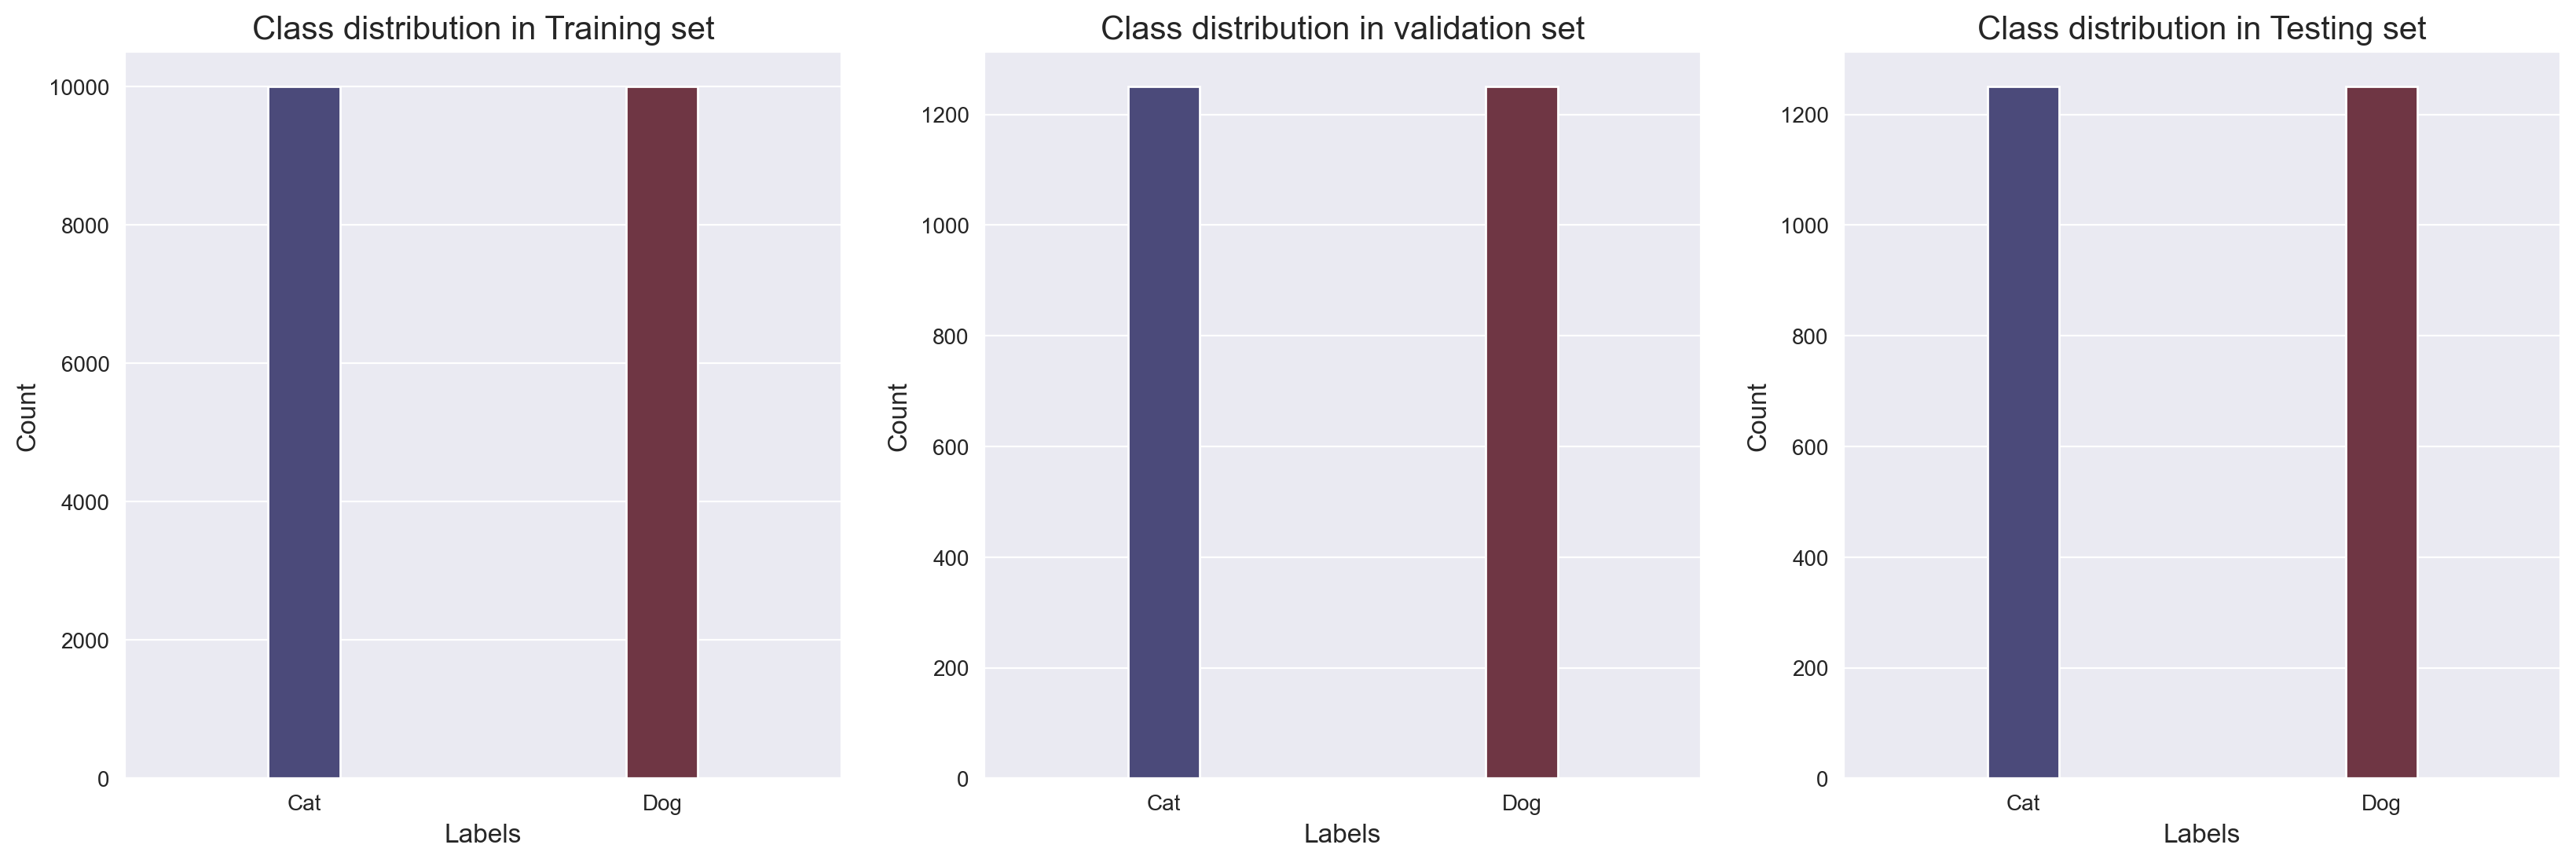

In [8]:
labels = ['Cat','Dog']

label1,count1 = np.unique(X_train.label,return_counts=True)
label2,count2 = np.unique(X_val.label,return_counts=True)
label3,count3 = np.unique(X_test.label,return_counts=True)

uni1 = pd.DataFrame(data=count1,index=labels,columns=['Count1'])
uni2 = pd.DataFrame(data=count2,index=labels,columns=['Count2'])
uni3 = pd.DataFrame(data=count3,index=labels,columns=['Count3'])


plt.figure(figsize=(20,6),dpi=200)
sns.set_style('darkgrid')

plt.subplot(131)
sns.barplot(data=uni1,x=uni1.index,y='Count1',palette='icefire',width=0.2).set_title('Class distribution in Training set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.subplot(132)
sns.barplot(data=uni2,x=uni2.index,y='Count2',palette='icefire',width=0.2).set_title('Class distribution in validation set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)


plt.subplot(133)
sns.barplot(data=uni3,x=uni3.index,y='Count3',palette='icefire',width=0.2).set_title('Class distribution in Testing set',fontsize=15)
plt.xlabel('Labels',fontsize=12)
plt.ylabel('Count',fontsize=12)

plt.show()

### Create directories

In [9]:
dataset_home = 'C:/Users/kumud/Downloads/pdata/D vs C/dataset_dogs_vs_cats/'
subdirs = ['train/', 'test/']

In [10]:
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        print(newdir)
        makedirs(newdir, exist_ok=True)

C:/Users/kumud/Downloads/pdata/D vs C/dataset_dogs_vs_cats/train/dogs/
C:/Users/kumud/Downloads/pdata/D vs C/dataset_dogs_vs_cats/train/cats/
C:/Users/kumud/Downloads/pdata/D vs C/dataset_dogs_vs_cats/test/dogs/
C:/Users/kumud/Downloads/pdata/D vs C/dataset_dogs_vs_cats/test/cats/


In [11]:
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.2
# copy training dataset images into subdirectories
src_directory = 'C:/Users/kumud/Downloads/pdata/D vs C/train'
for file in listdir(src_directory):
        src = src_directory + '/' + file
        dst_dir = 'train/'
        if random() < val_ratio:
            dst_dir = 'test/'
        if file.startswith('cat'):
            dst = dataset_home + dst_dir + 'cats/' + file
            copyfile(src, dst)
        elif file.startswith('dog'):
            dst = dataset_home + dst_dir + 'dogs/' + file
            copyfile(src, dst)

In [12]:
path1 = "C:/Users/kumud/Downloads/pdata/D vs C/dataset_dogs_vs_cats/train/cats"
path2 = "C:/Users/kumud/Downloads/pdata/D vs C/dataset_dogs_vs_cats/train/dogs"
path3 = "C:/Users/kumud/Downloads/pdata/D vs C/dataset_dogs_vs_cats/test/cats"
path4 = "C:/Users/kumud/Downloads/pdata/D vs C/dataset_dogs_vs_cats/test/dogs"


print('Then number of cat images in training data is' ,len(os.listdir(path1)))
print('Then number of dog images in training data is' ,len(os.listdir(path2)))
print('Then number of cat images in validation data is' ,len(os.listdir(path3)))
print('Then number of dog images in validation data is' ,len(os.listdir(path4)))

Then number of cat images in training data is 9945
Then number of dog images in training data is 9965
Then number of cat images in validation data is 2555
Then number of dog images in validation data is 2535


### parameters

firstly, we will list out all the important parameters and respective values.

In [13]:
image_size = 128
image_channel = 3
bat_size = 32

### Image Data Generator

In [14]:
# Creating image data generator
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range = 15,
                                    horizontal_flip = True,
                                    zoom_range = 0.2,
                                    shear_range = 0.1,
                                    fill_mode = 'reflect',
                                    width_shift_range = 0.1,
                                    height_shift_range = 0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

Using Dataframe

In [15]:
train_generator = train_datagen.flow_from_dataframe(X_train,
                                                    directory = 'C:/Users/kumud/Downloads/pdata/D vs C/train/',
                                                    x_col= 'filename',
                                                    y_col= 'label',
                                                    batch_size = bat_size,
                                                    target_size = (image_size,image_size)
                                                   )

Found 20000 validated image filenames belonging to 2 classes.


In [16]:
val_generator = test_datagen.flow_from_dataframe(X_val, 
                                                 directory = 'C:/Users/kumud/Downloads/pdata/D vs C/train/',
                                                 x_col= 'filename',
                                                 y_col= 'label',
                                                 batch_size = bat_size,
                                                 target_size = (image_size,image_size),
                                                 shuffle=False
                                                )

test_generator = test_datagen.flow_from_dataframe(X_test, 
                                                  directory = 'C:/Users/kumud/Downloads/pdata/D vs C/train/',
                                                  x_col= 'filename',
                                                  y_col= 'label',
                                                  batch_size = bat_size,
                                                  target_size = (image_size,image_size),
                                                  shuffle=False
                                                 )

Found 2500 validated image filenames belonging to 2 classes.
Found 2500 validated image filenames belonging to 2 classes.


Using Directory

In [17]:
train_gen = train_datagen.flow_from_directory('C:/Users/kumud/Downloads/pdata/D vs C/dataset_dogs_vs_cats/train/', 
                                              class_mode='binary',
                                              target_size = (image_size,image_size),
                                              batch_size = bat_size,
                                             )

Found 19910 images belonging to 2 classes.


In [18]:
val_gen = test_datagen.flow_from_directory('C:/Users/kumud/Downloads/pdata/D vs C/dataset_dogs_vs_cats/test/', 
                                          class_mode='binary',
                                          batch_size = bat_size,
                                          target_size = (image_size,image_size),
                                          shuffle = False
                                         )

Found 5090 images belonging to 2 classes.


In [19]:
type(val_generator)

keras.src.legacy.preprocessing.image.DataFrameIterator

In [20]:
len(val_generator)

79

### Model Layers

This code defines a Convolutional Neural Network (CNN) model using the Sequential API in Keras. It consists of several convolutional and pooling layers followed by fully connected layers. The model ends with an output layer using softmax activation for binary classification. The summary function provides an overview of the model's architecture and the number of parameters in each layer.

In [21]:
model = Sequential()

# Input Layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (image_size,image_size,image_channel))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Bloack 1 
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 2
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
# Block 3
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# Fully Connected layers 
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer
model.add(Dense(2,activation='softmax'))

model.summary()

C:\Users\kumud\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 61, 61, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 28, 28, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,719,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 5,112,514 (19.50 MB)

 Trainable params: 5,110,530 (19.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

Callbacks

In [22]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=5,         # Number of epochs with no improvement after which training will be stopped
    verbose=1,          # Verbosity mode
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Define ReduceLROnPlateau callback
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_loss', 
    patience=3, 
    verbose=1, 
    factor=0.2, 
    min_lr=0.0001
)

### Compile the model

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Fit the model

In [24]:

# Assuming you have train_generator and val_generator from ImageDataGenerator.flow_from_dataframe or similar

# Correctly set steps_per_epoch and validation_steps
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size
# Fit the model
cat_dog = model.fit(
    train_generator,
    validation_data=val_generator,
    callbacks=[early_stopping, learning_rate_reduction],
    epochs=30,  # Total number of epochs to train the model
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
)

Epoch 1/30


C:\Users\kumud\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 2763s 4s/step - accuracy: 0.6349 - loss: 0.7255 - val_accuracy: 0.7260 - val_loss: 0.5567 - learning_rate: 0.0010
Epoch 2/30


C:\Users\kumud\anaconda3\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 0.9769 - learning_rate: 0.0010
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2730s 4s/step - accuracy: 0.7378 - loss: 0.5323 - val_accuracy: 0.5962 - val_loss: 0.9028 - learning_rate: 0.0010
Epoch 4/30

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 2.1350 - learning_rate: 0.0010
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2732s 4s/step - accuracy: 0.8012 - loss: 0.4289 - val_accuracy: 0.8546 - val_loss: 0.3325 - learning_rate: 2.0000e-04
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.7704 - learning_rate: 2.0000e-04
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 2719s 4s/step - accuracy: 0.8303 - loss: 0.3807 - val_accuracy: 0.8706 - val_loss: 0.3125 -

#### Plots for accuracy and Loss with epochs

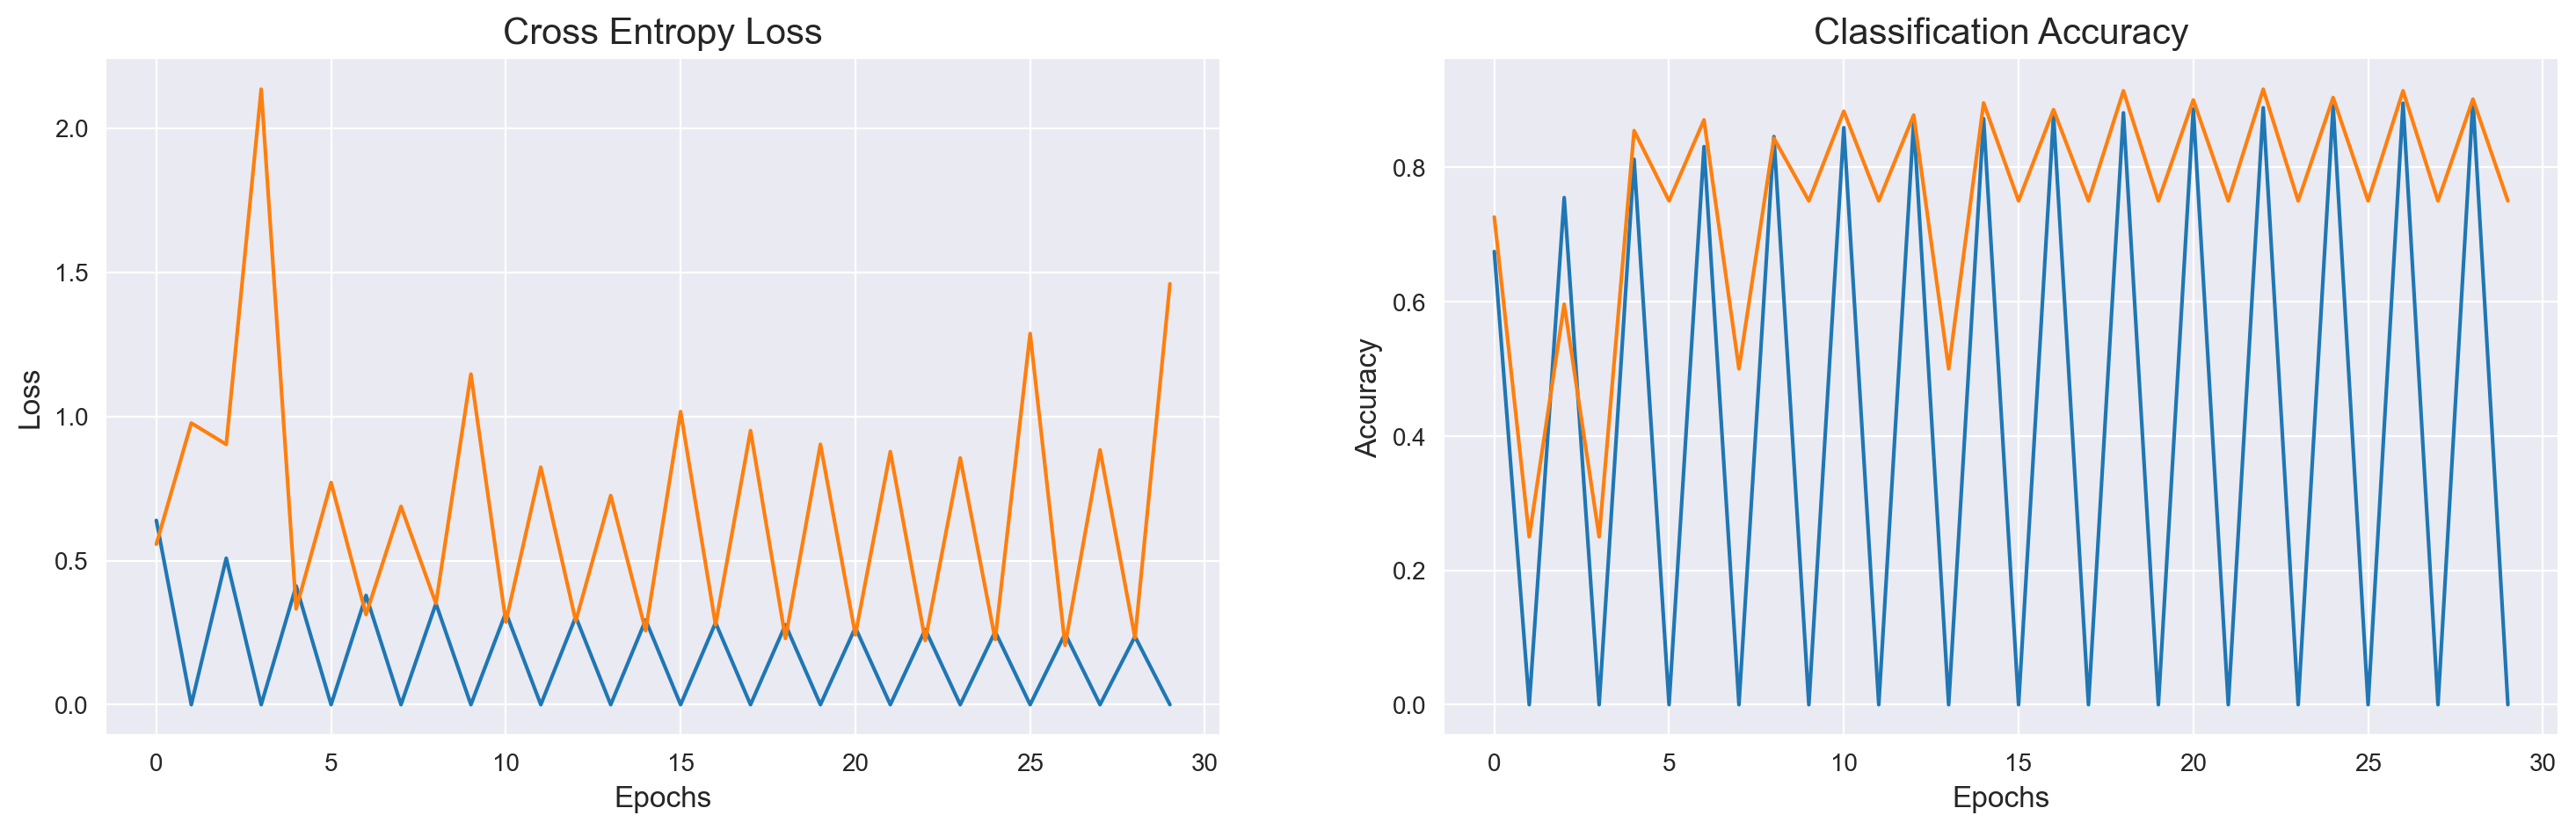

In [25]:


error = pd.DataFrame(cat_dog.history)

plt.figure(figsize=(18,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(error['loss'])
plt.plot(error['val_loss'])

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(error['accuracy'])
plt.plot(error['val_accuracy'])

plt.show()

### Evaluation

In [26]:
# Evaluate for train generator
loss,acc = model.evaluate(train_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluate for validation generator
loss,acc = model.evaluate(val_generator,batch_size = bat_size, verbose = 0)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

The accuracy of the model for training data is: 91.97999835014343
The Loss of the model for training data is: 0.19382023811340332
The accuracy of the model for validation data is: 91.36000275611877
The Loss of the model for validation data is: 0.20704296231269836


In [27]:
# Save the Model
model.save('my_model.keras')

In [28]:
# prediction
result = model.predict(test_generator,batch_size = bat_size,verbose = 0)

y_pred = np.argmax(result, axis = 1)

y_true = test_generator.labels

# Evaluvate
loss,acc = model.evaluate(test_generator, batch_size = bat_size, verbose = 0)

print('The accuracy of the model for testing data is:',acc*100)
print('The Loss of the model for testing data is:',loss)

The accuracy of the model for testing data is: 91.68000221252441
The Loss of the model for testing data is: 0.19702425599098206


In [29]:
labels =['Cat','Dog']
print(classification_report(y_true, y_pred,target_names=labels))

              precision    recall  f1-score   support

         Cat       0.90      0.94      0.92      1250
         Dog       0.94      0.90      0.91      1250

    accuracy                           0.92      2500
   macro avg       0.92      0.92      0.92      2500
weighted avg       0.92      0.92      0.92      2500



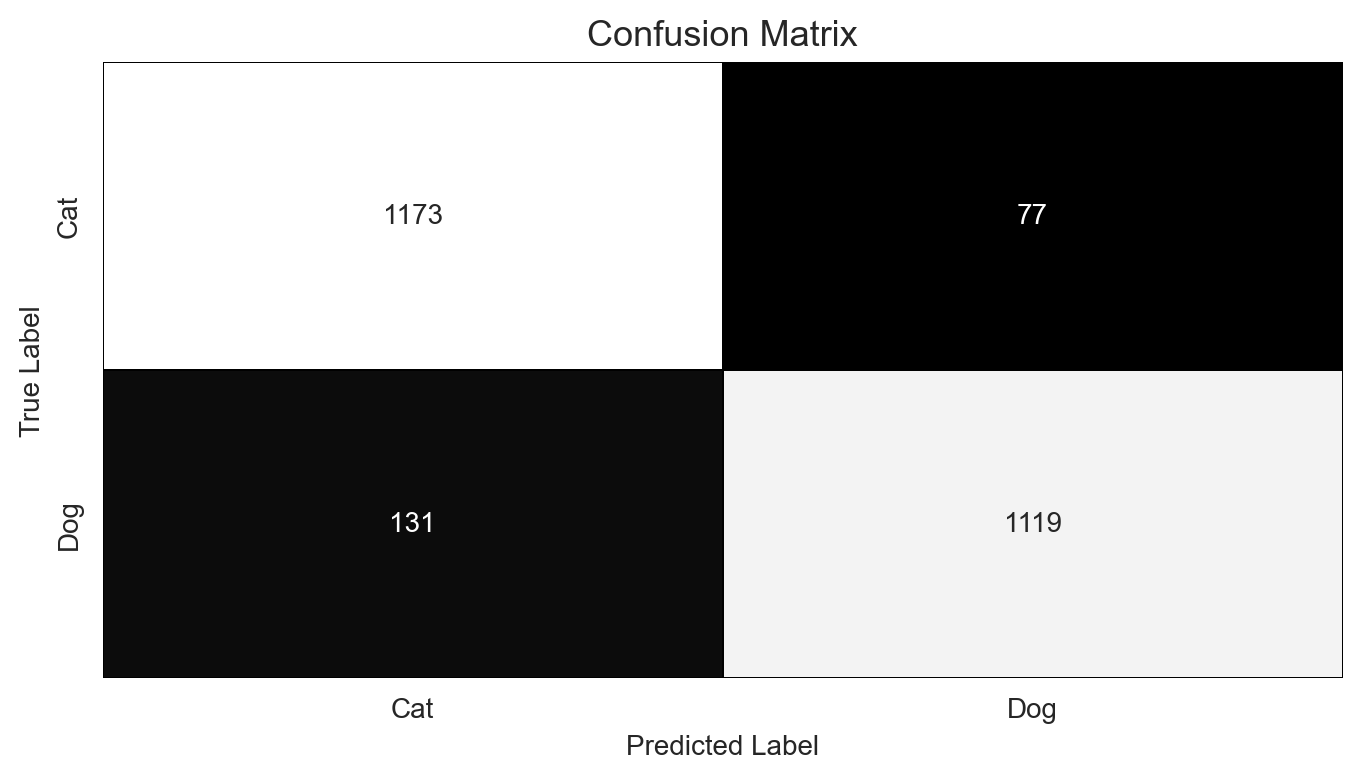

In [30]:
confusion_mtx = confusion_matrix(y_true,y_pred) 

f,ax = plt.subplots(figsize = (8,4),dpi=200)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.1, cmap = "gist_yarg_r", linecolor="black", fmt='.0f', ax=ax,cbar=False, xticklabels=labels, yticklabels=labels)

plt.xlabel("Predicted Label",fontsize=10)
plt.ylabel("True Label",fontsize=10)
plt.title("Confusion Matrix",fontsize=13)

plt.show()

In [31]:
from sklearn.metrics import precision_score, f1_score

# Predict on validation data
val_steps = len(val_generator)  
val_preds = model.predict(val_generator, steps=val_steps)

# Assuming binary classification, flatten the predictions if necessary
val_pred_labels = np.argmax(val_preds, axis=1) if val_preds.shape[-1] > 1 else (val_preds > 0.5).astype(int).flatten()

# Get the true labels from the validation generator and convert to numpy array
val_true_labels = np.array(val_generator.classes)

# Print shapes for debugging
print(f"val_preds shape: {val_preds.shape}")
print(f"val_true_labels shape: {val_true_labels.shape}")

# Check if true labels and predicted labels have the same length
assert len(val_true_labels) == len(val_pred_labels), f"Mismatch between true and predicted labels length: {len(val_true_labels)} != {len(val_pred_labels)}"

# Calculate precision and F1 score
precision = precision_score(val_true_labels, val_pred_labels)
f1 = f1_score(val_true_labels, val_pred_labels)

print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

79/79 ━━━━━━━━━━━━━━━━━━━━ 55s 695ms/step
val_preds shape: (2500, 2)
val_true_labels shape: (2500,)
Precision: 0.9388794567062818
F1 Score: 0.9110378912685336


In [32]:
print(f"Number of samples in validation set: {val_generator.samples}")
print(f"Batch size: {val_generator.batch_size}")
print(f"Steps per validation epoch: {val_steps}")
print(f"Number of predicted samples: {len(val_pred_labels)}")

Number of samples in validation set: 2500
Batch size: 32
Steps per validation epoch: 79
Number of predicted samples: 2500
